## Rains in Australia

In this project, we will build a model to predict rainfall in Australia.

<img src='https://drive.google.com/uc?id=1u6AkuFke2L7DsnjN1RBFNY1ZWGVAb2cr' width="400" height="400">

Dataset taken from:
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [7]:
import pandas as pd
import numpy as np

## Loading the data

In [8]:
df = pd.read_csv('weather.csv')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,2014-10-05,Uluru,19.5,39.2,0.0,NaN,NaN,N,48.0,NE,...,11.0,8.0,1012.7,1007.7,NaN,1.0,30.2,37.6,No,No
141211,2014-10-06,Uluru,19.9,38.3,0.0,NaN,NaN,S,50.0,NW,...,12.0,8.0,1009.7,1008.4,1.0,NaN,32.2,36.3,No,No
141212,2014-10-07,Uluru,15.5,30.3,0.0,NaN,NaN,ESE,48.0,ESE,...,28.0,16.0,1018.1,1014.4,NaN,NaN,21.4,28.8,No,No
141213,2014-10-08,Uluru,15.1,33.2,0.0,NaN,NaN,E,50.0,E,...,21.0,11.0,1019.1,1014.0,NaN,NaN,21.7,31.7,No,No


In [9]:
for column in df.columns:
    print(column+':', df[column].isna().sum())

Date: 0
Location: 0
MinTemp: 637
MaxTemp: 322
Rainfall: 1397
Evaporation: 59865
Sunshine: 66838
WindGustDir: 9305
WindGustSpeed: 9245
WindDir9am: 9974
WindDir3pm: 3753
WindSpeed9am: 1326
WindSpeed3pm: 2607
Humidity9am: 1774
Humidity3pm: 3610
Pressure9am: 14014
Pressure3pm: 13981
Cloud9am: 52994
Cloud3pm: 56505
Temp9am: 904
Temp3pm: 2726
RainToday: 1397
RainTomorrow: 0


## Preprocessing numbers

We can do such thing using built-in `fillna()` data frame method for each column in `mean_cols` list of numerical columns:

In [11]:
%%time
num_cols = ('MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
             'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm',
             'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm')

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

Wall time: 28 ms


Now let's check if there are really no `NaN`s in preprocessed `df` columns with names from `num_cols`:

In [12]:
for column in df.columns:
    print(column+':', df[column].isna().sum())

Date: 0
Location: 0
MinTemp: 0
MaxTemp: 0
Rainfall: 0
Evaporation: 0
Sunshine: 0
WindGustDir: 9305
WindGustSpeed: 0
WindDir9am: 9974
WindDir3pm: 3753
WindSpeed9am: 0
WindSpeed3pm: 0
Humidity9am: 0
Humidity3pm: 0
Pressure9am: 0
Pressure3pm: 0
Cloud9am: 0
Cloud3pm: 0
Temp9am: 0
Temp3pm: 0
RainToday: 1397
RainTomorrow: 0


Here are two ways of filling missing values in cathegorical columns:

In [13]:
#Using mapper
mapping = {'No':0, 'Yes':1, np.NaN:2}
rain_today = np.array(df['RainToday'].map(mapping))
rain_tomorrow = np.array(df['RainTomorrow'].map(mapping))
df['RainToday'] = rain_today
df['RainTomorrow'] = rain_tomorrow

#Using fillna() method
na_df = df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].fillna('no value')

for col in na_df.columns:
    df[col] = na_df[col].values

Let's check again if we have some NaN values

In [14]:
for column in df.columns:
    print(column+':', df[column].isna().sum())

Date: 0
Location: 0
MinTemp: 0
MaxTemp: 0
Rainfall: 0
Evaporation: 0
Sunshine: 0
WindGustDir: 0
WindGustSpeed: 0
WindDir9am: 0
WindDir3pm: 0
WindSpeed9am: 0
WindSpeed3pm: 0
Humidity9am: 0
Humidity3pm: 0
Pressure9am: 0
Pressure3pm: 0
Cloud9am: 0
Cloud3pm: 0
Temp9am: 0
Temp3pm: 0
RainToday: 0
RainTomorrow: 0


## Сathegorical data preprocessing

In [15]:
%%time
#Naming all categorical columns
cat = ('Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday')
#creating a pd.DataFrame
to_concantenate = pd.DataFrame([])
#Iterating throw columns with names from cat in df
for i in range(len(cat)):
    #making one-hot encoded dataframe from each column
    dummy = pd.get_dummies(df[cat[i]])
    #adding column from dummy to general dataframe
    for dc in dummy.columns:
        to_concantenate[('{}_'+str(dc)).format(cat[i])] = dummy[dc]
        
to_concantenate

Wall time: 125 ms


,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_no value,RainToday_0,RainToday_1,RainToday_2
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
141211,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
141212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
141213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#Adding categorical columns to the df
df = pd.concat((to_concantenate, df), axis = 1)
#Dropping old columns
df = df.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

In [17]:
df

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,0,0,1,0,0,0,0,0,0,0,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.501653,16.9,21.8,0
1,0,0,1,0,0,0,0,0,0,0,...,22.0,44.0,25.0,1010.6,1007.8,4.433117,4.501653,17.2,24.3,0
2,0,0,1,0,0,0,0,0,0,0,...,26.0,38.0,30.0,1007.6,1008.7,4.433117,2.000000,21.0,23.2,0
3,0,0,1,0,0,0,0,0,0,0,...,9.0,45.0,16.0,1017.6,1012.8,4.433117,4.501653,18.1,26.5,0
4,0,0,1,0,0,0,0,0,0,0,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,0,0,0,0,0,0,0,0,0,0,...,28.0,11.0,8.0,1012.7,1007.7,4.433117,1.000000,30.2,37.6,0
141211,0,0,0,0,0,0,0,0,0,0,...,22.0,12.0,8.0,1009.7,1008.4,1.000000,4.501653,32.2,36.3,0
141212,0,0,0,0,0,0,0,0,0,0,...,26.0,28.0,16.0,1018.1,1014.4,4.433117,4.501653,21.4,28.8,0
141213,0,0,0,0,0,0,0,0,0,0,...,11.0,21.0,11.0,1019.1,1014.0,4.433117,4.501653,21.7,31.7,0


## Date preprocessing

The `Date` column contains **the date**:

In [18]:
#Looking at the date format
df[['Date']]

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05
...,...
141210,2014-10-05
141211,2014-10-06
141212,2014-10-07
141213,2014-10-08


In [19]:
from datetime import datetime
#Creating 3 arrays for month, day, year
join_month = np.zeros(df.shape[0])
join_day   = np.zeros(df.shape[0])
join_year  = np.zeros(df.shape[0])
#Creating datetime object, changing its format, casting to string, 
#splitting it into 3 parts and cast each to integer.
for i in range(df.shape[0]):
    date_time_str=df['Date'].values[i]
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d')
    date = date_time_obj.strftime("%m %d %y").split()
    join_month[i] = float(date[0])
    join_day[i]   = float(date[1])
    join_year[i]  = float(date[2])
#Add new columns to the df
df['Date_month'] = join_month
df['Date_day']   = join_day
df['Date_year']  = join_year
#Drop df[Date] column
df = df.drop(['Date'], axis = 1)

Let's check the last 3 date columns:

In [20]:
df

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Date_month,Date_day,Date_year
0,0,0,1,0,0,0,0,0,0,0,...,1007.7,1007.1,8.000000,4.501653,16.9,21.8,0,12.0,1.0,8.0
1,0,0,1,0,0,0,0,0,0,0,...,1010.6,1007.8,4.433117,4.501653,17.2,24.3,0,12.0,2.0,8.0
2,0,0,1,0,0,0,0,0,0,0,...,1007.6,1008.7,4.433117,2.000000,21.0,23.2,0,12.0,3.0,8.0
3,0,0,1,0,0,0,0,0,0,0,...,1017.6,1012.8,4.433117,4.501653,18.1,26.5,0,12.0,4.0,8.0
4,0,0,1,0,0,0,0,0,0,0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,12.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,0,0,0,0,0,0,0,0,0,0,...,1012.7,1007.7,4.433117,1.000000,30.2,37.6,0,10.0,5.0,14.0
141211,0,0,0,0,0,0,0,0,0,0,...,1009.7,1008.4,1.000000,4.501653,32.2,36.3,0,10.0,6.0,14.0
141212,0,0,0,0,0,0,0,0,0,0,...,1018.1,1014.4,4.433117,4.501653,21.4,28.8,0,10.0,7.0,14.0
141213,0,0,0,0,0,0,0,0,0,0,...,1019.1,1014.0,4.433117,4.501653,21.7,31.7,0,10.0,8.0,14.0


We don't know about dependencies which date pass into the result, so we let our model find it itself by making date cathegorical.

In [21]:
%%time
#Solution

cat = ('Date_month', 'Date_day', 'Date_year')
#creating a pd.DataFrame
to_concantenate = pd.DataFrame([])
#Iterating throw columns with names from cat in df
for i in range(len(cat)):
    #making one-hot encoded dataframe from each column
    dummy = pd.get_dummies(df[cat[i]])
    #adding column from dummy to general dataframe
    for dc in dummy.columns:
        to_concantenate[('{}_'+str(dc)).format(cat[i])] = dummy[dc]
        
to_concantenate

Wall time: 62 ms


,Date_month_1.0,Date_month_2.0,Date_month_3.0,Date_month_4.0,Date_month_5.0,Date_month_6.0,Date_month_7.0,Date_month_8.0,Date_month_9.0,Date_month_10.0,...,Date_year_8.0,Date_year_9.0,Date_year_10.0,Date_year_11.0,Date_year_12.0,Date_year_13.0,Date_year_14.0,Date_year_15.0,Date_year_16.0,Date_year_17.0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
141211,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
141212,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
141213,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#Adding categorical columns to the df
df = pd.concat((df, to_concantenate), axis = 1)

In [23]:
df

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Date_year_8.0,Date_year_9.0,Date_year_10.0,Date_year_11.0,Date_year_12.0,Date_year_13.0,Date_year_14.0,Date_year_15.0,Date_year_16.0,Date_year_17.0
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
141211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
141212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
141213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting targets from values:

In [24]:
#Remembering targets
y = df['RainTomorrow'].values
#Droping targets
df = df.drop('RainTomorrow', axis = 1)
#Remembering the features
X = df.values

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8568848918316043

## Visualization of the results

Let's plot a graph to see how accurate our results are. The blue line is the real values that were in y_test, and the yellow line is the predicted by our model.

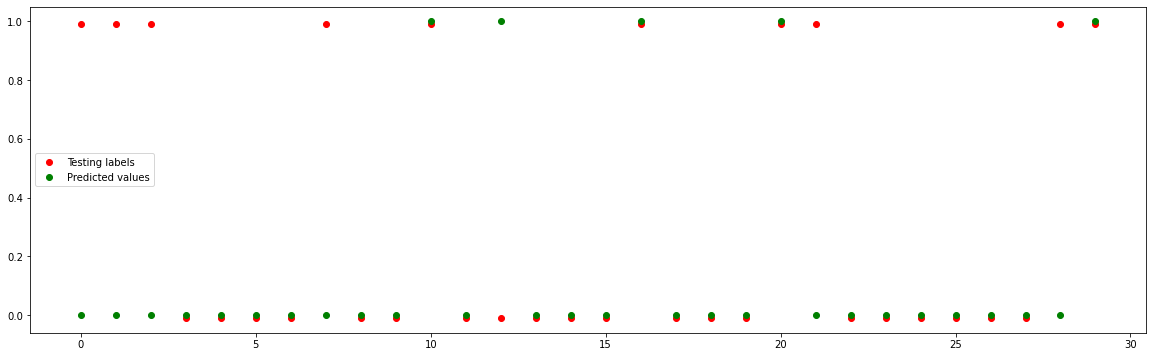

In [26]:
import matplotlib.pyplot as plt

#first_n is the number of dots that appear on graph
first_n = 30
plt.rcParams["figure.figsize"] = (20,6)

plt.plot([i for i in range(len(y_test[:first_n]))], y_test[:first_n]-0.01, color='r', label='Testing labels', linestyle='', marker='o')
plt.plot([i for i in range(len(X_test[:first_n]))], clf.predict(X_test[:first_n]), color='g', label='Predicted values', linestyle='', marker='o')

plt.legend()
plt.show()